# DRUG CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DOWNLOADED DATASET

In [2]:
df=pd.read_csv('drug200 (2).csv')

## UNDERSTANDING OF THE DATASET

In [3]:
df.shape,df.size

((200, 6), 1200)

In [4]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
108,72,M,HIGH,NORMAL,9.677,drugB
15,16,F,HIGH,NORMAL,15.516,DrugY
67,17,M,NORMAL,NORMAL,10.832,drugX
180,22,F,HIGH,NORMAL,22.818,DrugY
179,67,F,NORMAL,HIGH,15.891,DrugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [9]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


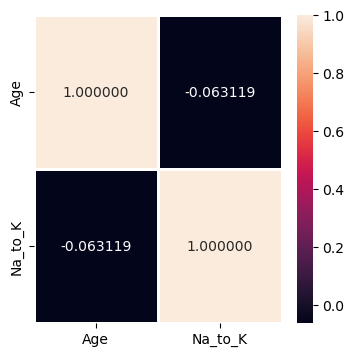

In [10]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),annot=True,fmt='f',linewidth=True)
plt.show()

## UNIVARIATE ANALYSIS OF DATA

In [11]:
df.select_dtypes(exclude='object')

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
plt.style.use('fivethirtyeight')

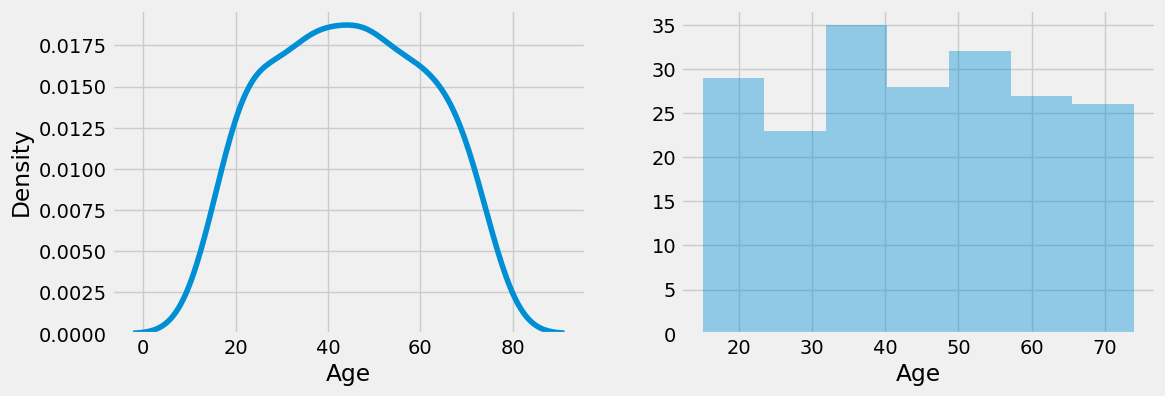

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(df['Age'],hist=False)
plt.subplot(122)
sns.distplot(df['Age'],kde=False)
plt.show()

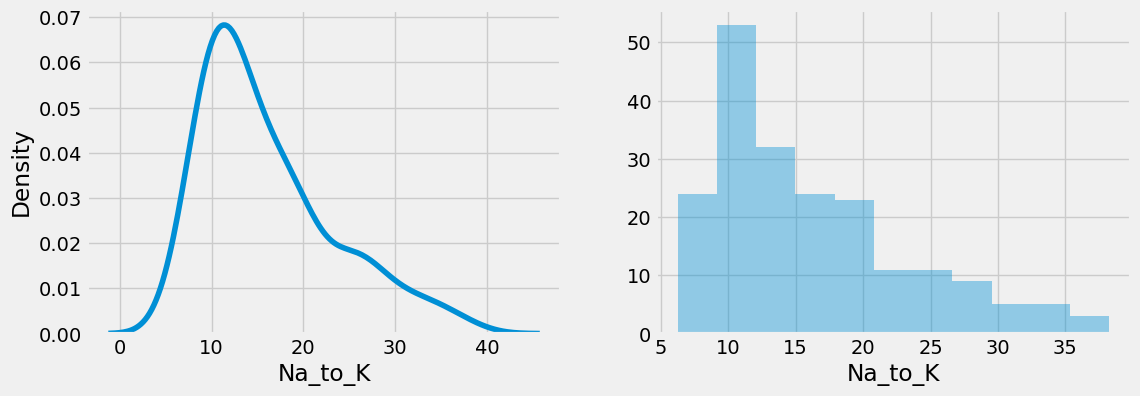

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(df['Na_to_K'],hist=False)
plt.subplot(122)
sns.distplot(df['Na_to_K'],kde=False)
plt.show()

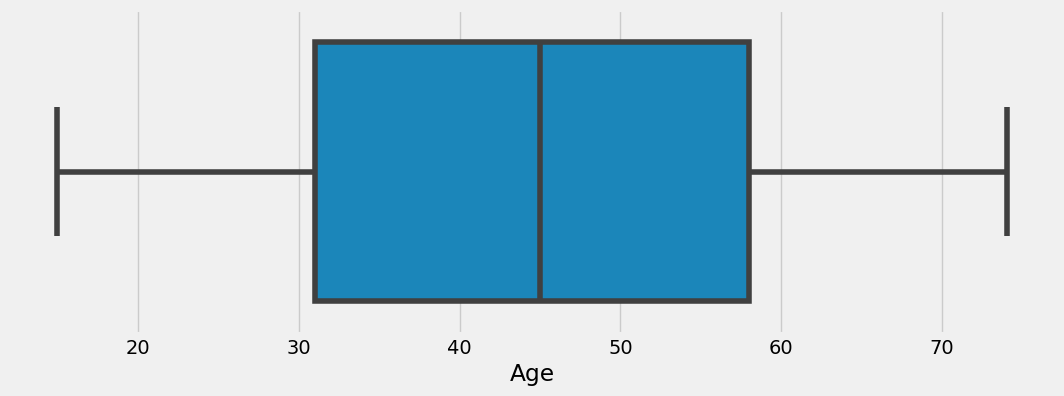

In [16]:
plt.figure(figsize=(12,4))
sns.boxplot(df['Age'])
plt.show()

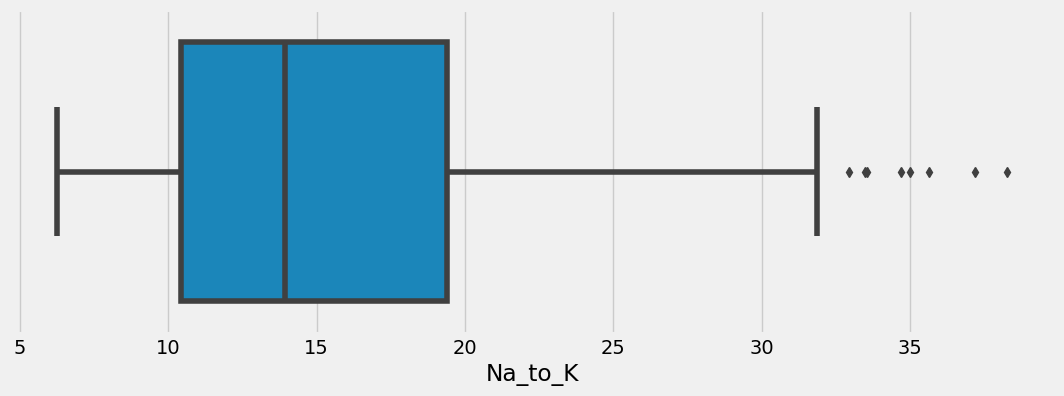

In [17]:
plt.figure(figsize=(12,4))
sns.boxplot(df['Na_to_K'])
plt.show()

In [18]:
df.select_dtypes(include='object')

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


In [19]:
print("no. of unique object:",df['Sex'].nunique())
print(df['Sex'].value_counts())

no. of unique object: 2
M    104
F     96
Name: Sex, dtype: int64


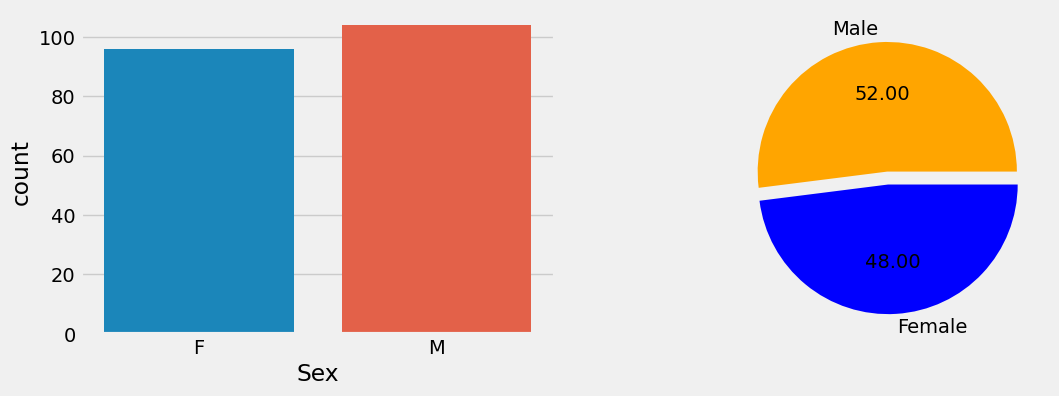

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(df['Sex'])
plt.subplot(122)
plt.pie(df.Sex.value_counts(),[0,0.1],colors=['orange','blue'],labels=['Male','Female'],autopct="%.2f")
plt.show()

In [21]:
print("no. of unique object:",df['BP'].nunique())
print(df['BP'].value_counts())

no. of unique object: 3
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


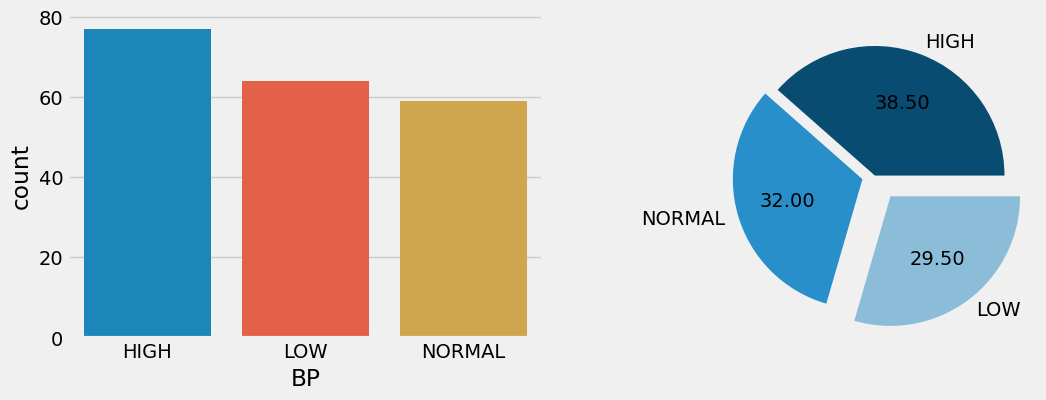

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(df['BP'])
plt.subplot(122)
plt.pie(df.BP.value_counts(),[0,0.1,0.2],colors=['#094c72','#298fca','#8bbdd9'],labels=['HIGH','NORMAL','LOW'],autopct='%.2f')
plt.show()

In [23]:
print("no. of unique object:",df['Cholesterol'].nunique())
print(df['Cholesterol'].value_counts())

no. of unique object: 2
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


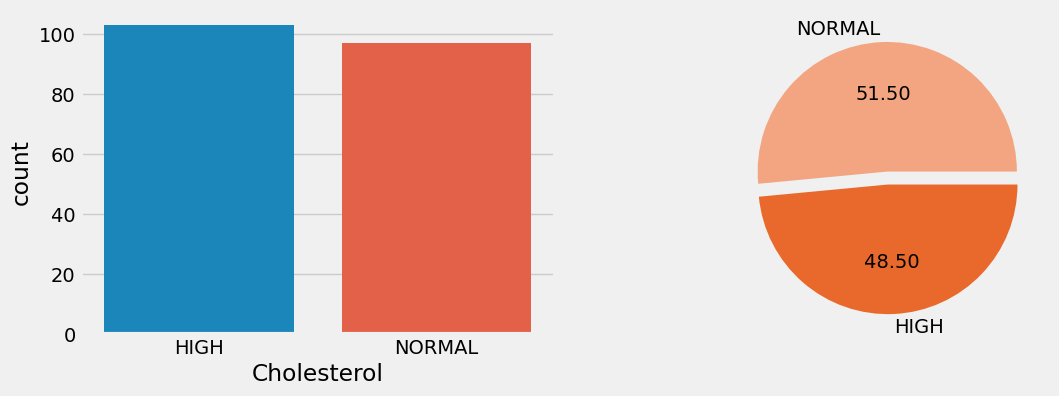

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(df['Cholesterol'])
plt.subplot(122)
plt.pie(df.Cholesterol.value_counts(),[0,0.1],colors=['#f2a580','#e9692c'],labels=['NORMAL','HIGH'],autopct='%.2f')
plt.show()

In [25]:
print("no. of unique object:",df['Drug'].nunique())
print(df['Drug'].value_counts())

no. of unique object: 5
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


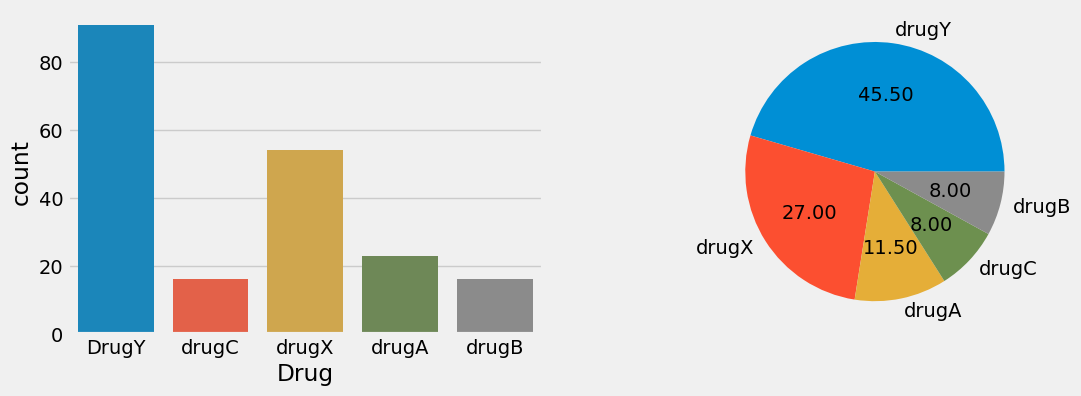

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(df['Drug'])
plt.subplot(122)
plt.pie(df.Drug.value_counts(),labels=['drugY','drugX','drugA','drugC','drugB'],autopct='%.2f')
plt.show()

## BIVARIATE ANALYSIS OF DATA

In [27]:
df.select_dtypes(include='object')

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


In [28]:
df.select_dtypes(exclude='object')

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


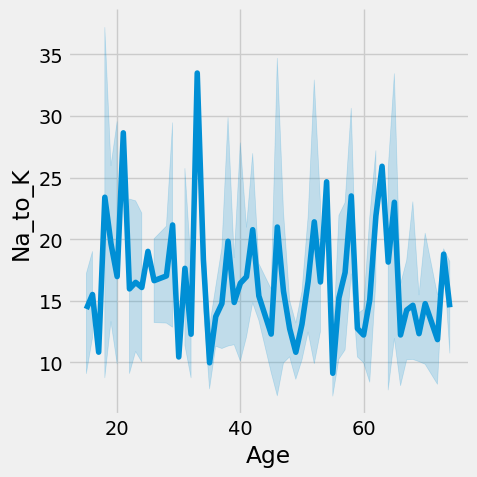

In [29]:
sns.relplot(x='Age',y='Na_to_K',data=df,kind='line')
plt.show()

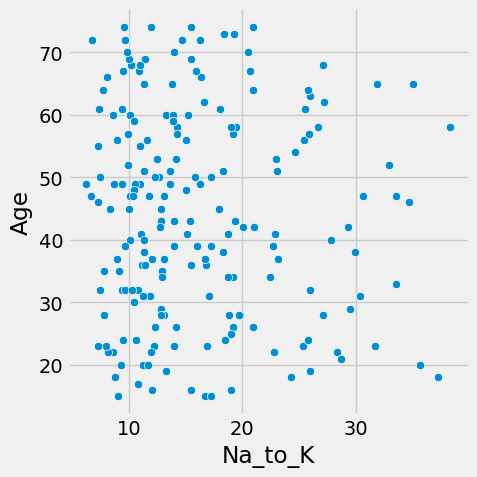

In [30]:
sns.relplot(y='Age',x='Na_to_K',data=df)
plt.show()

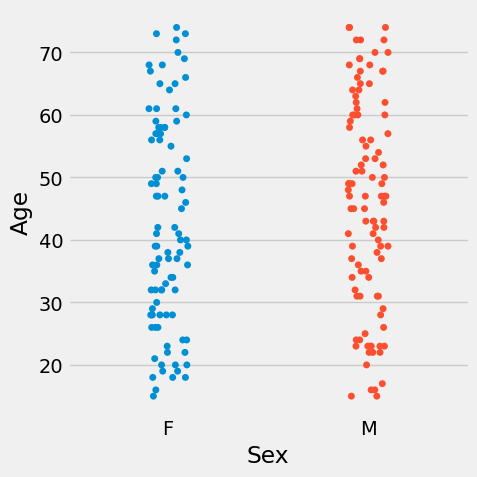

In [31]:
sns.catplot(x='Sex',y='Age',data=df)
plt.show()

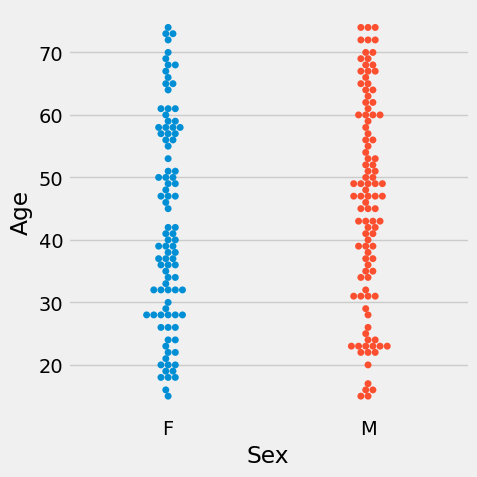

In [32]:
sns.catplot(x='Sex',y='Age',kind='swarm',data=df)
plt.show()

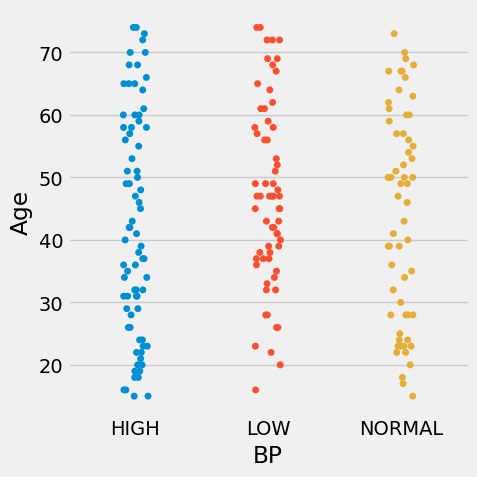

In [33]:
sns.catplot(x='BP',y='Age',data=df)
plt.show()

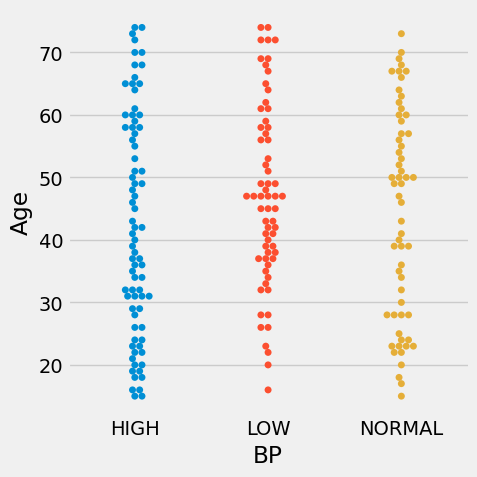

In [34]:
sns.catplot(x='BP',y='Age',kind='swarm',data=df)
plt.show()

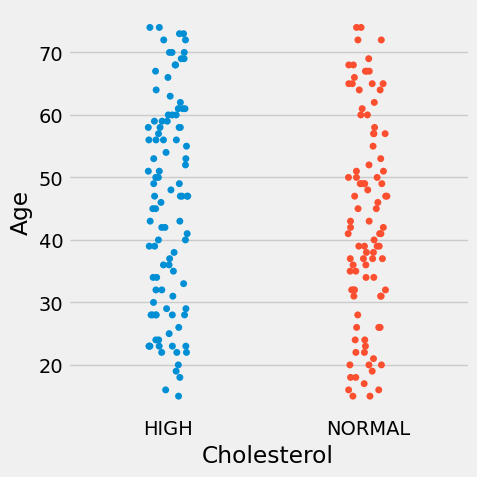

In [35]:
sns.catplot(x='Cholesterol',y='Age',data=df)
plt.show()

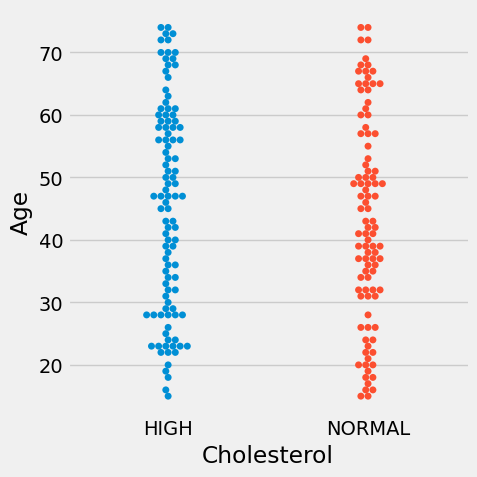

In [36]:
sns.catplot(x='Cholesterol',y='Age',kind='swarm',data=df)
plt.show()

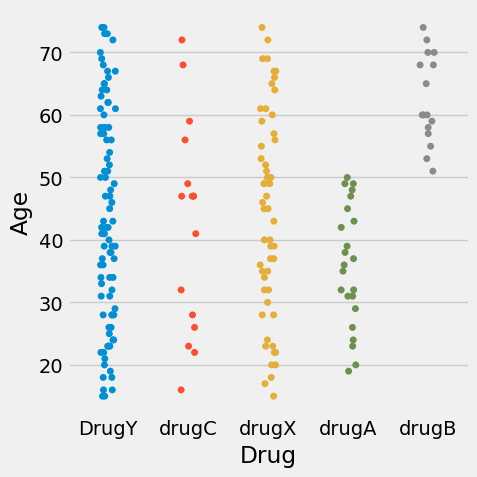

In [37]:
sns.catplot(x='Drug',y='Age',data=df)
plt.show()

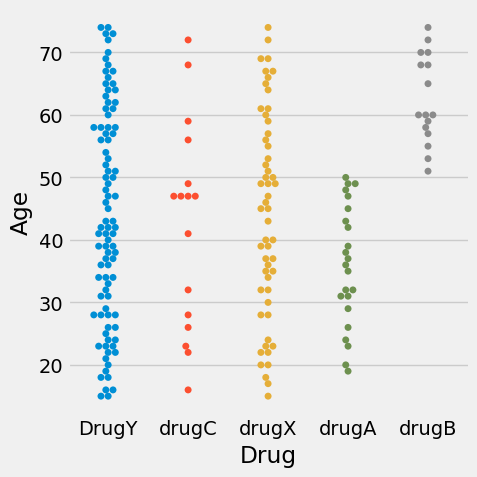

In [38]:
sns.catplot(x='Drug',y='Age',kind='swarm',data=df)
plt.show()

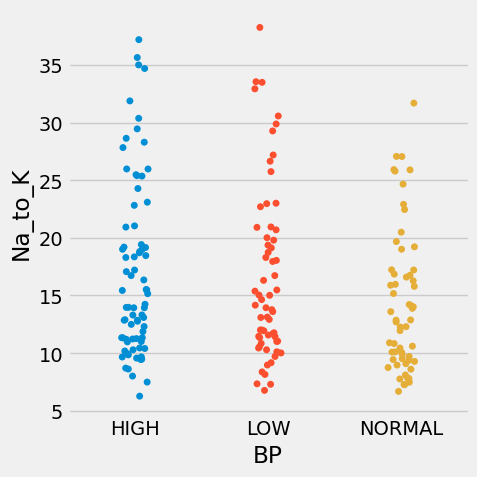

In [39]:
sns.catplot(x='BP',y='Na_to_K',data=df)
plt.show()

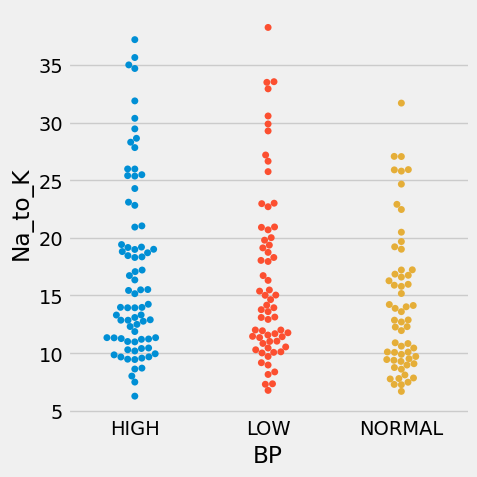

In [40]:
sns.catplot(x='BP',y='Na_to_K',kind='swarm',data=df)
plt.show()

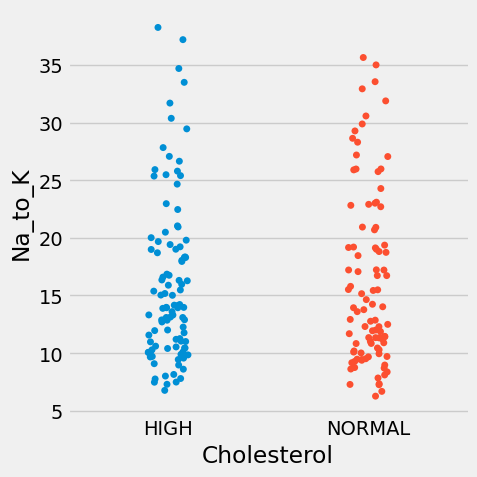

In [41]:
sns.catplot(x='Cholesterol',y='Na_to_K',data=df)
plt.show()

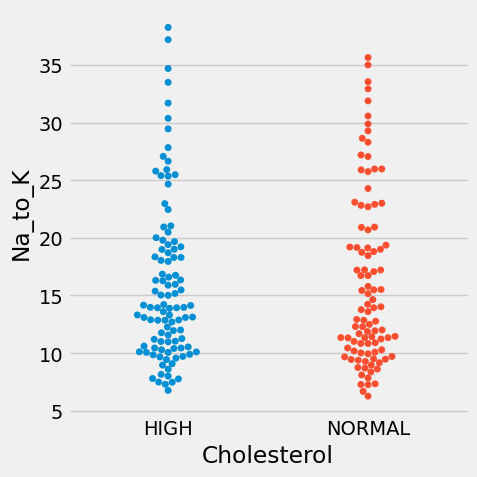

In [42]:
sns.catplot(x='Cholesterol',y='Na_to_K',kind='swarm',data=df)
plt.show()

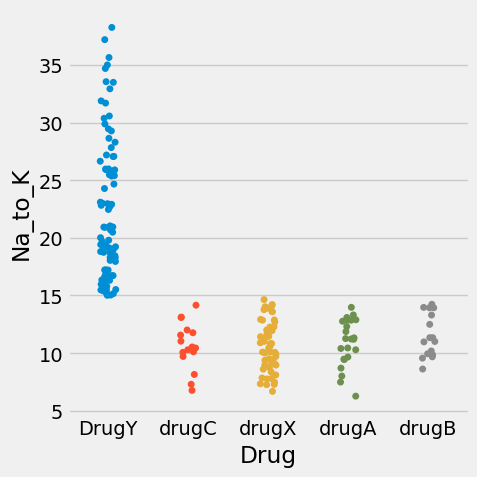

In [43]:
sns.catplot(x='Drug',y='Na_to_K',data=df)
plt.show()

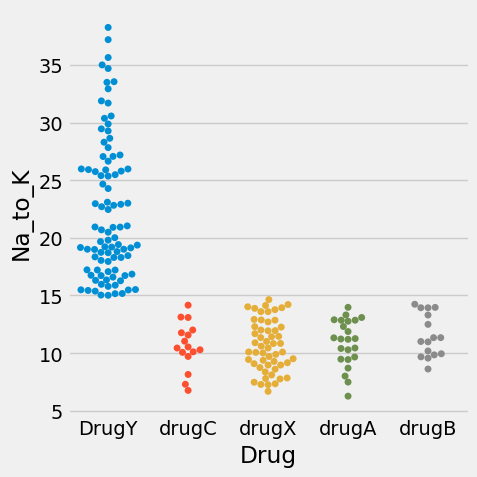

In [44]:
sns.catplot(x='Drug',y='Na_to_K',kind='swarm',data=df)
plt.show()

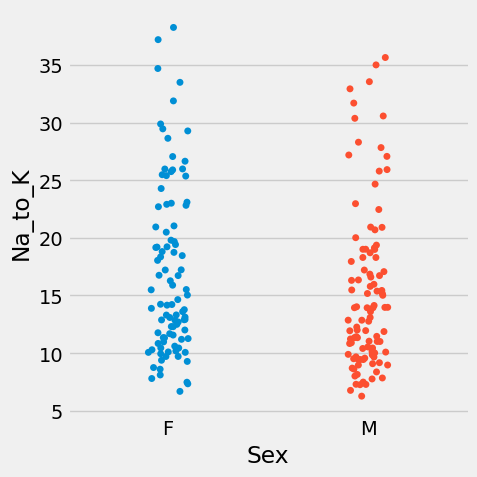

In [45]:
sns.catplot(x='Sex',y='Na_to_K',data=df)
plt.show()

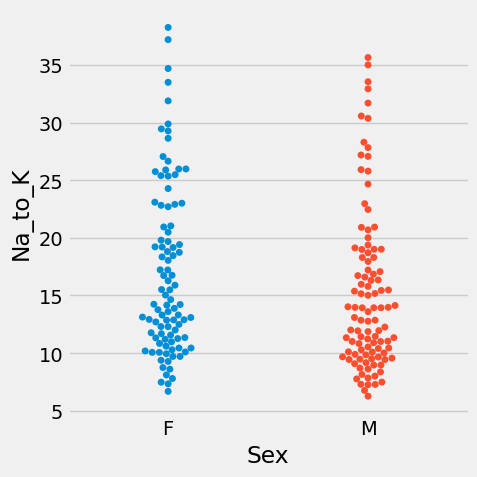

In [46]:
sns.catplot(x='Sex',y='Na_to_K',kind='swarm',data=df)
plt.show()

## MULTIVARIATE ANALYSIS OF DATA

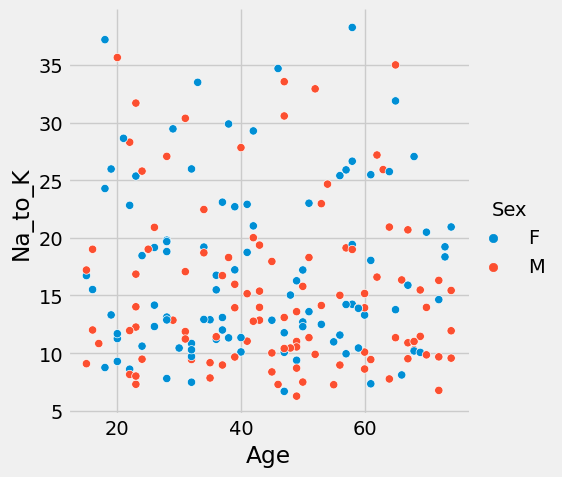

In [47]:
sns.relplot(x='Age',y='Na_to_K',hue='Sex',data=df)

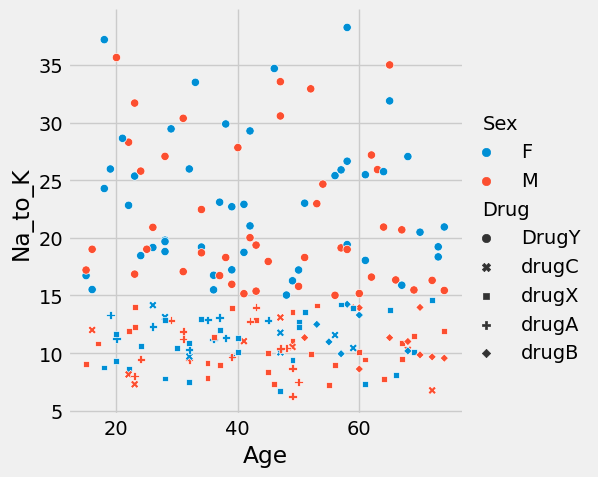

In [48]:
sns.relplot(x='Age',y='Na_to_K',hue='Sex',style='Drug',data=df)

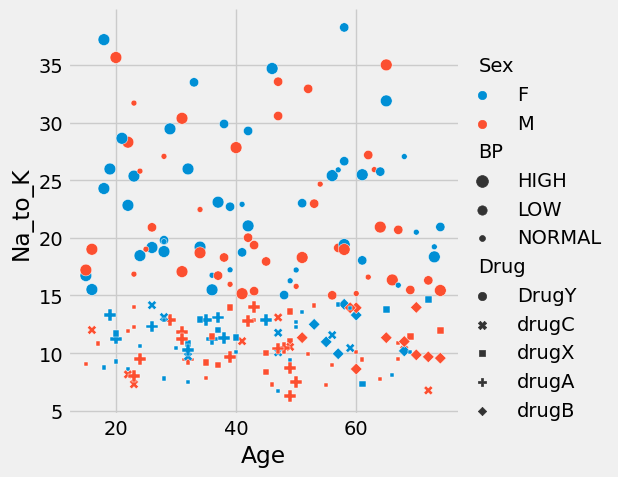

In [49]:
sns.relplot(x='Age',y='Na_to_K',hue='Sex',style='Drug',size='BP',data=df)

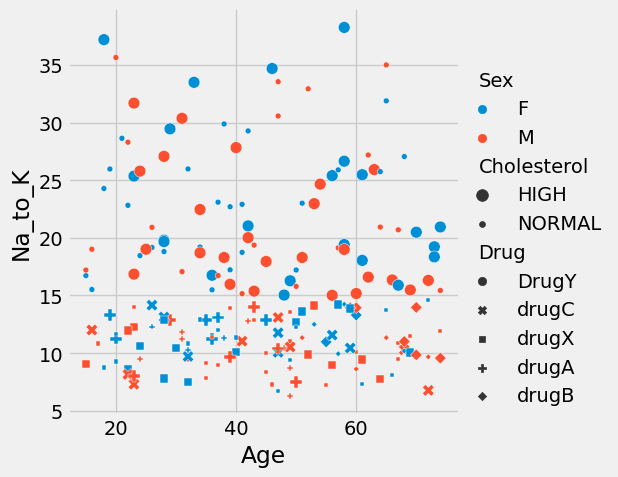

In [50]:
sns.relplot(x='Age',y='Na_to_K',hue='Sex',style='Drug',size='Cholesterol',data=df)

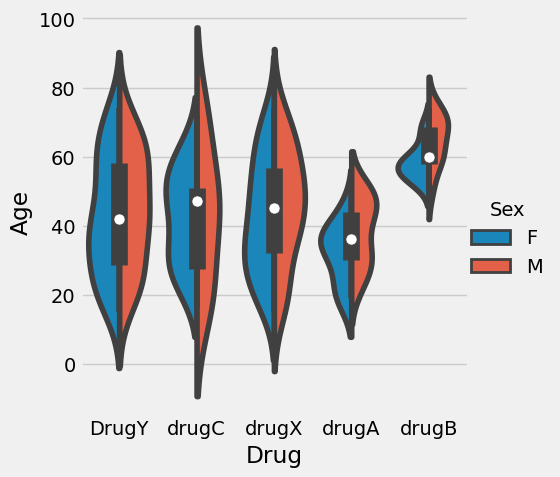

In [51]:
sns.catplot(x='Drug',y='Age',hue='Sex',split=True,kind='violin',data=df)
plt.show()

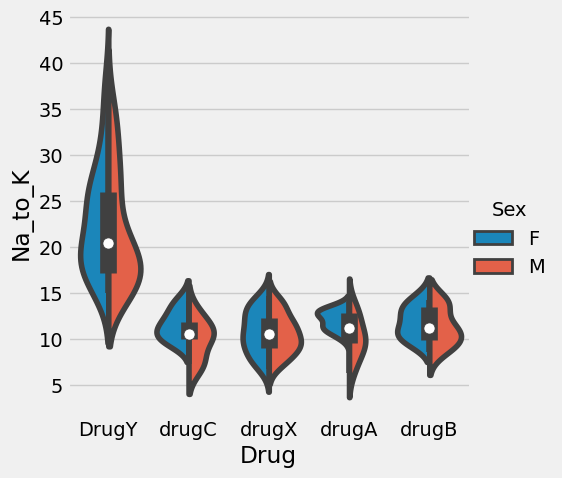

In [52]:
sns.catplot(x='Drug',y='Na_to_K',hue='Sex',split=True,kind='violin',data=df)
plt.show()

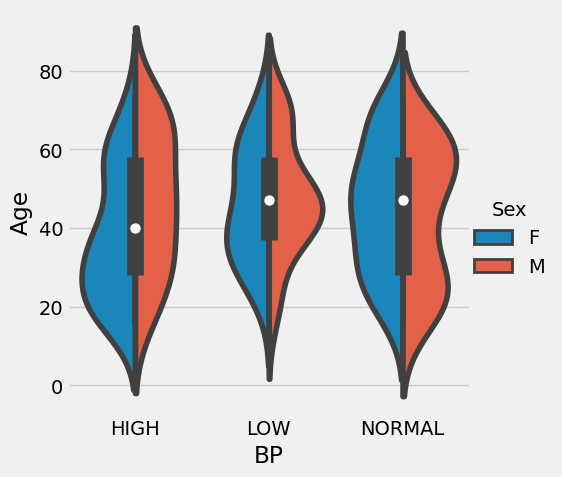

In [53]:
sns.catplot(x='BP',y='Age',split=True,hue='Sex',kind='violin',data=df)
plt.show()

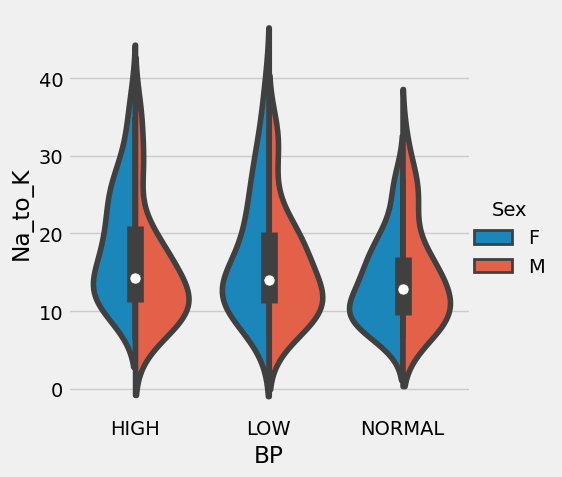

In [54]:
sns.catplot(x='BP',y='Na_to_K',hue='Sex',split=True,kind='violin',data=df)
plt.show()

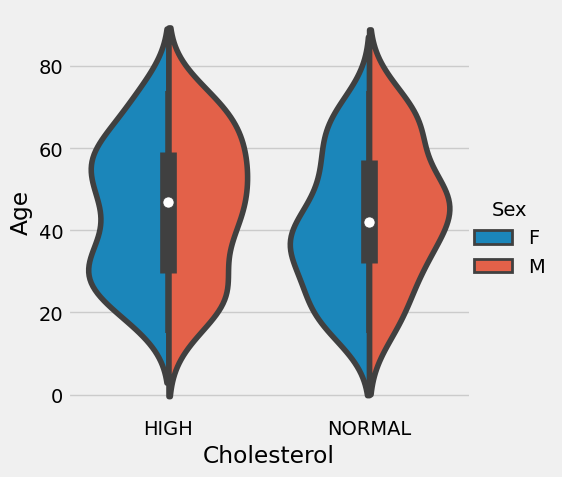

In [55]:
sns.catplot(x='Cholesterol',y='Age',split=True,hue='Sex',kind='violin',data=df)
plt.show()

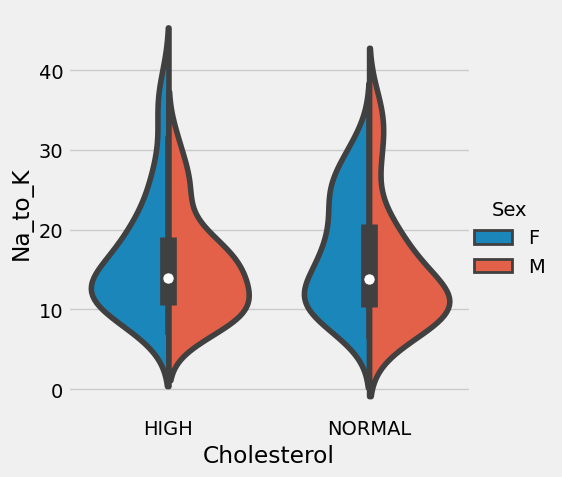

In [56]:
sns.catplot(x='Cholesterol',y='Na_to_K',hue='Sex',split=True,kind='violin',data=df)
plt.show()

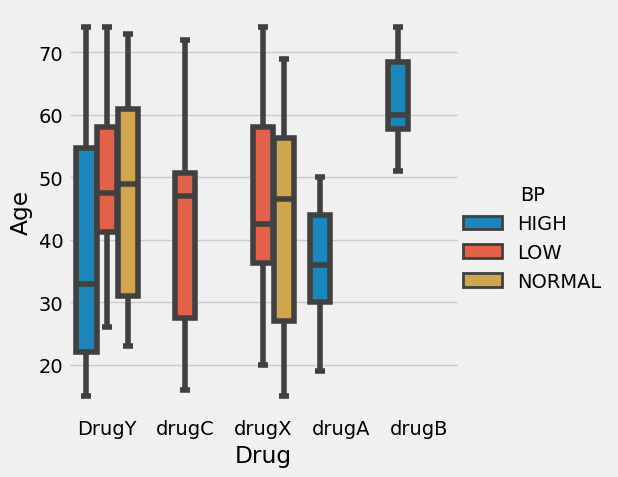

In [57]:
sns.catplot(x='Drug',y='Age',hue='BP',kind='box',data=df)
plt.show()

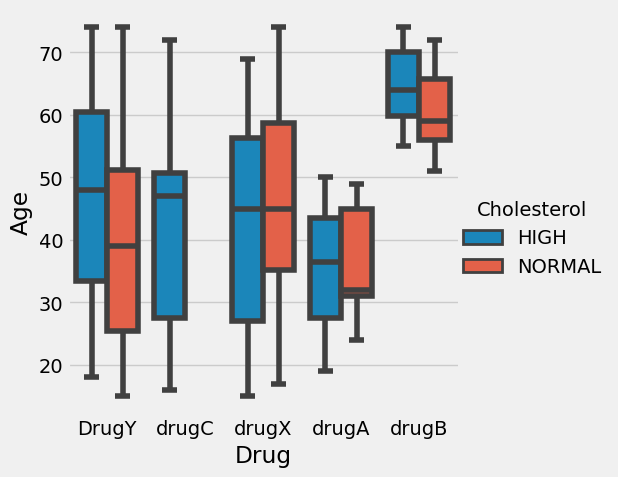

In [58]:
sns.catplot(x='Drug',y='Age',hue='Cholesterol',kind='box',data=df)
plt.show()

## DATA PREPROCESSING

### MISSING VALUES

In [59]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#### No Missing Values in this dataset

### OUTLIER DETECTION

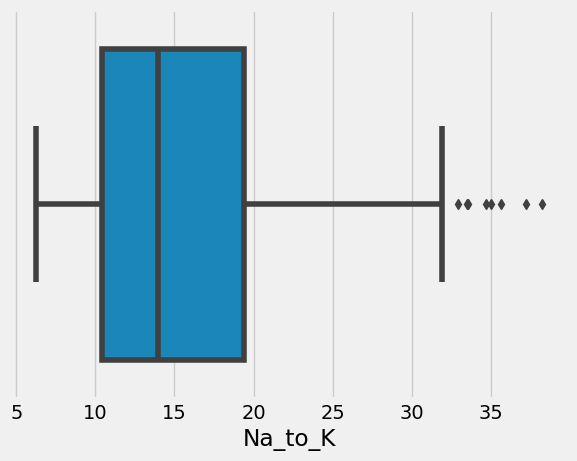

In [60]:
sns.boxplot(df['Na_to_K'])
plt.show()

In [61]:
percentile_25=df.Na_to_K.quantile(0.25)
percentile_75=df.Na_to_K.quantile(0.75)
print("25th percentile of Na_to_K:",percentile_25)
print("75th percentile of Na_to_K:",percentile_75)

25th percentile of Na_to_K: 10.4455
75th percentile of Na_to_K: 19.38


In [62]:
iqr=percentile_75-percentile_25
print("iqr of Na_to_K:",iqr)

iqr of Na_to_K: 8.9345


In [63]:
upper_limit=percentile_75+1.5*iqr
lower_limit=percentile_25-1.5*iqr
print("upper limit of Na_to_K:",upper_limit)
print("lower limit of Na_to_K:",lower_limit)

upper limit of Na_to_K: 32.78175
lower limit of Na_to_K: -2.9562500000000007


In [64]:
df.Na_to_K.describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

### CAPING OF OUTLIERS

In [65]:
df['Na_to_K']=np.where(df['Na_to_K']>upper_limit,
                       upper_limit,
                      np.where(df['Na_to_K']<lower_limit,
                              lower_limit,df['Na_to_K']))

In [66]:
df['Na_to_K'].describe()

count    200.000000
mean      15.992220
std        6.981639
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       32.781750
Name: Na_to_K, dtype: float64

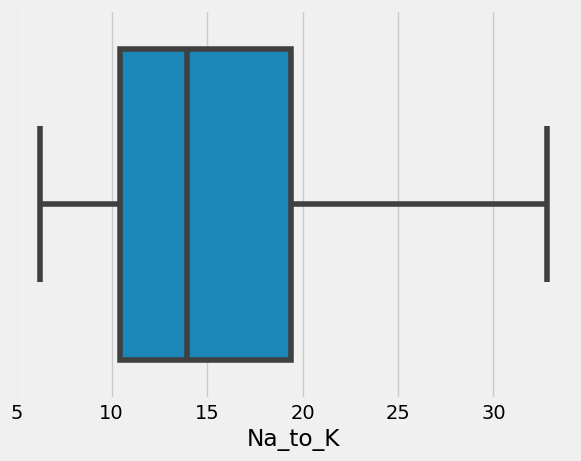

In [67]:
sns.boxplot(df['Na_to_K'])
plt.show()

### SPLITING DATA INTO TRAIN AND TEST

In [68]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [69]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [70]:
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [72]:
X_train.shape,X_test.shape

((160, 5), (40, 5))

In [73]:
X_train.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K
139,69,F,NORMAL,HIGH,10.06500
192,72,M,LOW,HIGH,16.31000
131,52,M,LOW,NORMAL,32.78175
73,41,F,NORMAL,NORMAL,22.90500
69,18,F,HIGH,NORMAL,24.27600


### ENCODING CATEGORICAL DATA

In [74]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

In [75]:
tr1=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,dtype='int32'),[1])
],remainder='passthrough')

In [76]:
tr2=ColumnTransformer(transformers=[
    ('oe3',OrdinalEncoder(categories=[['LOW','NORMAL','HIGH']]),[3])
],remainder='passthrough')

In [77]:
tr3=ColumnTransformer(transformers=[
    ('oe4',OrdinalEncoder(categories=[['NORMAL','HIGH']]),[4])
],remainder='passthrough')

### MODEL BUILDING

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
tr4=DecisionTreeClassifier()

In [80]:
pipe_dt=Pipeline([
    ('tr1',tr1),
    ('tr2',tr2),
    ('tr3',tr3),
    ('tr4',tr4)
])

In [81]:
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('tr1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype='int32',
                                                                sparse=False),
                                                  [1])])),
                ('tr2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe3',
                                                  OrdinalEncoder(categories=[['LOW',
                                                                              'NORMAL',
                                                                              'HIGH']]),
                                                  [3])])),
                ('tr3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe4',
                                                  OrdinalEncoder(categories=[['NORMAL',
                                                                              'HIGH']]),
                                                  [4])])),
                ('tr4', DecisionTreeClassifier())])

In [82]:
y_pred_dt=pipe_dt.predict(X_test)
print('decision tree:')
print('confusion matrix:')
print(confusion_matrix(y_test,y_pred_dt))
print('classification report:')
print(classification_report(y_test,y_pred_dt))

decision tree:
confusion matrix:
[[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]
classification report:
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        19
       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [83]:
tr5=KNeighborsClassifier()

In [84]:
pipe_knn=Pipeline([
    ('tr1',tr1),
    ('tr2',tr2),
    ('tr3',tr3),
    ('tr5',tr5)
])

In [85]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('tr1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype='int32',
                                                                sparse=False),
                                                  [1])])),
                ('tr2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe3',
                                                  OrdinalEncoder(categories=[['LOW',
                                                                              'NORMAL',
                                                                              'HIGH']]),
                                                  [3])])),
                ('tr3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe4',
                                                  OrdinalEncoder(categories=[['NORMAL',
                                                                              'HIGH']]),
                                                  [4])])),
                ('tr5', KNeighborsClassifier())])

In [86]:
y_pred_knn=pipe_knn.predict(X_test)
print('KNeighborsClassifier:')
print('confusion matrix:')
print(confusion_matrix(y_test,y_pred_knn))
print('classification report:')
print(classification_report(y_test,y_pred_knn))

KNeighborsClassifier:
confusion matrix:
[[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  1  0  0  2]
 [ 1  5  2  0  6]]
classification report:
              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        19
       drugA       0.33      1.00      0.50         3
       drugB       0.33      1.00      0.50         1
       drugC       0.00      0.00      0.00         3
       drugX       0.75      0.43      0.55        14

    accuracy                           0.73        40
   macro avg       0.47      0.69      0.50        40
weighted avg       0.75      0.72      0.70        40



In [87]:
tr6=GradientBoostingClassifier()

In [88]:
pipe_gb=Pipeline([
    ('tr1',tr1),
    ('tr2',tr2),
    ('tr3',tr3),
    ('tr6',tr6)
])

In [89]:
pipe_gb.fit(X_train,y_train)

Pipeline(steps=[('tr1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype='int32',
                                                                sparse=False),
                                                  [1])])),
                ('tr2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe3',
                                                  OrdinalEncoder(categories=[['LOW',
                                                                              'NORMAL',
                                                                              'HIGH']]),
                                                  [3])])),
                ('tr3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe4',
                                                  OrdinalEncoder(categories=[['NORMAL',
                                                                              'HIGH']]),
                                                  [4])])),
                ('tr6', GradientBoostingClassifier())])

In [90]:
y_pred_gb=pipe_gb.predict(X_test)
print('GradientBoostingClassifier:')
print('confusion matrix:')
print(confusion_matrix(y_test,y_pred_gb))
print('classification report:')
print(classification_report(y_test,y_pred_gb))

GradientBoostingClassifier:
confusion matrix:
[[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  2  1]
 [ 0  0  0  0 14]]
classification report:
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        19
       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      0.67      0.80         3
       drugX       0.93      1.00      0.97        14

    accuracy                           0.97        40
   macro avg       0.99      0.93      0.95        40
weighted avg       0.98      0.97      0.97        40



In [91]:
tr7=RandomForestClassifier()

In [92]:
pipe_rf=Pipeline([
    ('tr1',tr1),
    ('tr2',tr2),
    ('tr3',tr3),
    ('tr7',tr7)
])

In [93]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('tr1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype='int32',
                                                                sparse=False),
                                                  [1])])),
                ('tr2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe3',
                                                  OrdinalEncoder(categories=[['LOW',
                                                                              'NORMAL',
                                                                              'HIGH']]),
                                                  [3])])),
                ('tr3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe4',
                                                  OrdinalEncoder(categories=[['NORMAL',
                                                                              'HIGH']]),
                                                  [4])])),
                ('tr7', RandomForestClassifier())])

In [94]:
y_pred_rf=pipe_rf.predict(X_test)
print('RandomForestClassifier:')
print('confusion matrix:')
print(confusion_matrix(y_test,y_pred_rf))
print('classification report:')
print(classification_report(y_test,y_pred_rf))

RandomForestClassifier:
confusion matrix:
[[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]
classification report:
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        19
       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

### COMPARING OF MODELS

In [96]:
print('rf:',y_pred_rf,'dt:',y_pred_dt,'knn:',y_pred_knn,'gb:',y_pred_gb)

rf: ['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX'] dt: ['drugC' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugC' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugC' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugX' 'DrugY' 'drugA' 'drugX'] knn: ['drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugA' 'drugA' 'DrugY'
 'drugB' 'drugA' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugX' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugX' 'drugA' 'DrugY' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugB' 'drugA' 'drugA' 'drugX' 'DrugY' 'DrugY'
 'drugA' 'DrugY' 'drugA' 'drugX'] gb: ['dru

In [97]:
score_rf=f1_score(y_pred_rf,y_test,average='weighted')

In [98]:
score_dt=f1_score(y_pred_dt,y_test,average='weighted')

In [99]:
score_knn=f1_score(y_pred_knn,y_test,average='weighted')

In [100]:
score_gb=f1_score(y_pred_gb,y_test,average='weighted')

In [101]:
print('rf:',score_rf,'dt:',score_dt,'knn:',score_knn,'gb:',score_gb)

rf: 1.0 dt: 1.0 knn: 0.7462703962703963 gb: 0.9770689655172415


In [102]:
pd.crosstab(y_test,y_pred_gb)

col_0,DrugY,drugA,drugB,drugC,drugX
Drug,,,,,
DrugY,19,0,0,0,0
drugA,0,3,0,0,0
drugB,0,0,1,0,0
drugC,0,0,0,2,1
drugX,0,0,0,0,14


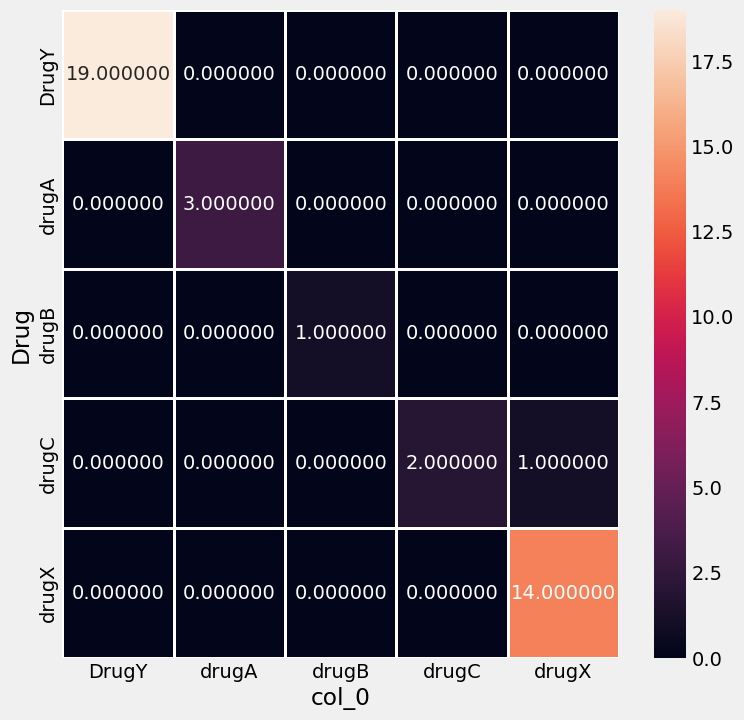

In [103]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.crosstab(y_test,y_pred_gb),annot=True,linewidth=True,fmt='f')
plt.show()

In [104]:
import joblib

In [105]:
joblib.dump(pipe_gb,'model.pkl')

['model.pkl']